In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import os
import seaborn as sns
import csv
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


csv = os.path.join('santhosh.csv')
movie_df = pd.read_csv(csv,encoding='latin-1')

In [2]:
movie_df = movie_df[movie_df.Budget!=0]
movie_df = movie_df[movie_df.Revenue!=0]
movie_df.dropna(subset=['Overview'])
movie_df.head()

,Title,Movie ID,Genre,Production Company,Budget,Revenue,Overview,Release Date
0,Pirates of the Caribbean: At World's End,285.0,Adventure,Jerry Bruckheimer Films,300000000.0,961000000.0,"Captain Barbossa, long believed to be dead, ha...",2007-05-19
1,Harry Potter and the Order of the Phoenix,675.0,Adventure,Warner Bros. Pictures,150000000.0,938212738.0,Returning for his fifth year of study at Hogwa...,2007-06-28
2,Spider-Man 3,559.0,Fantasy,Marvel Enterprises,258000000.0,890871626.0,The seemingly invincible Spider-Man goes up ag...,2007-05-01
5,Live Free or Die Hard,1571.0,Action,Dune Entertainment,110000000.0,383531464.0,"John McClane is back and badder than ever, and...",2007-06-20
6,Zodiac,1949.0,Crime,Paramount,65000000.0,84785914.0,"The true story of the investigation of the ""Zo...",2007-03-02


In [3]:
movie_df = movie_df.dropna(subset = ['Overview'])
compound_list = []
for overview in movie_df['Overview']:
    compound = analyzer.polarity_scores(overview)["compound"]
    compound_list.append(compound)
movie_df['Sentiment Score']=compound_list


In [4]:
movie_df['ROI']=(movie_df['Revenue']-movie_df['Budget'])/movie_df['Budget']
movie_df_adj = movie_df[movie_df.ROI<20]


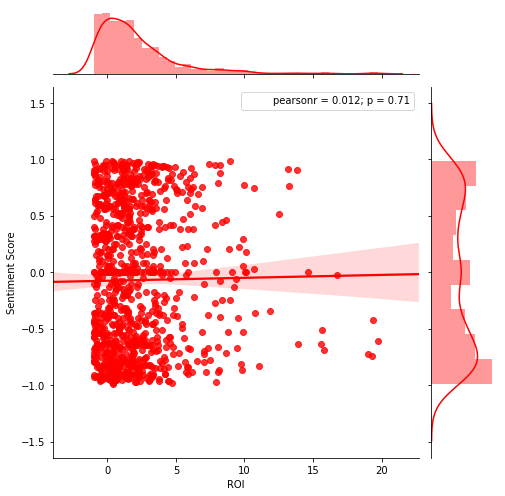

In [5]:

g = sns.jointplot("ROI", "Sentiment Score", data=movie_df_adj, kind="reg", color="r", size=7)

In [6]:
movie_df_mean=movie_df.groupby(['Production Company']).mean()
movie_df_mean=movie_df_mean.sort_values(['ROI'],ascending = False)
movie_df_mean=movie_df_mean[movie_df_mean.ROI <70]
movie_df_mean = movie_df_mean.reset_index()
movie_df_mean.head()

,Production Company,Movie ID,Budget,Revenue,Sentiment Score,ROI
0,Room 101,79738.5,3000000.0,122288241.0,-0.4310,64.161044
1,Monkeypaw Productions,419430.0,4500000.0,255017329.0,-0.4678,55.670518
2,Stage 6 Films,35919.5,4750000.0,53819235.5,-0.2205,32.000716
3,Ada Films,84355.0,125000.0,3200000.0,-0.1779,24.600000
4,Vesuvius Productions,440021.0,4800000.0,117883845.0,-0.6908,23.559134


Text(0.5,1,'Top 10 Production Company with Leading Average ROI')

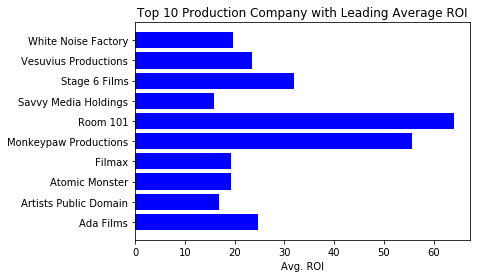

In [7]:
#Plot bargraph using the top 10 production company (measuring efficiency of each production company)
x_axis = movie_df_mean['Production Company'][0:10]
y_axis = movie_df_mean['ROI'][0:10]
plt.barh(x_axis,y_axis,color = 'blue')
plt.xlabel("Avg. ROI")
plt.title("Top 10 Production Company with Leading Average ROI")
